In [1]:
!pip install GDAL==$(gdal-config --version)
!pip install pyproj geopandas
%pip install segment-geospatial
!pip install torch torchvision datasets
!pip install -q monai
from IPython import display
display.clear_output()
print("package installed")

package installed


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


M1. Load Geotiff data, create segmentation and visualize them

In [3]:
import os
import torch
from samgeo import SamGeo, tms_to_geotiff
from osgeo import gdal
import matplotlib.pyplot as plt

In [4]:
bbox = [-73.990573, 40.754296, -73.988573, 40.7556]
image = 'satellite.tif'
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source='Satellite',overwrite=True)

out_dir = './'
checkpoint = os.path.join(out_dir, 'sam_vit_h_4b8939.pth')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam = SamGeo(
    checkpoint=checkpoint,
    model_type='vit_h',
    device=device,
    erosion_kernel=(3, 3),
    mask_multiplier=255,
    sam_kwargs=None,
)


Downloaded image 01/42
Downloaded image 02/42
Downloaded image 03/42
Downloaded image 04/42
Downloaded image 05/42
Downloaded image 06/42
Downloaded image 07/42
Downloaded image 08/42
Downloaded image 09/42
Downloaded image 10/42
Downloaded image 11/42
Downloaded image 12/42
Downloaded image 13/42
Downloaded image 14/42
Downloaded image 15/42
Downloaded image 16/42
Downloaded image 17/42
Downloaded image 18/42
Downloaded image 19/42
Downloaded image 20/42
Downloaded image 21/42
Downloaded image 22/42
Downloaded image 23/42
Downloaded image 24/42
Downloaded image 25/42
Downloaded image 26/42
Downloaded image 27/42
Downloaded image 28/42
Downloaded image 29/42
Downloaded image 30/42
Downloaded image 31/42
Downloaded image 32/42
Downloaded image 33/42
Downloaded image 34/42
Downloaded image 35/42
Downloaded image 36/42
Downloaded image 37/42
Downloaded image 38/42
Downloaded image 39/42
Downloaded image 40/42
Downloaded image 41/42
Downloaded image 42/42
Saving GeoTIFF. Please wait...
Ima

Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:07<00:00, 337MB/s]


In [5]:
mask = 'segment.tif'
sam.generate(image, mask)

vector = 'segment.gpkg'
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

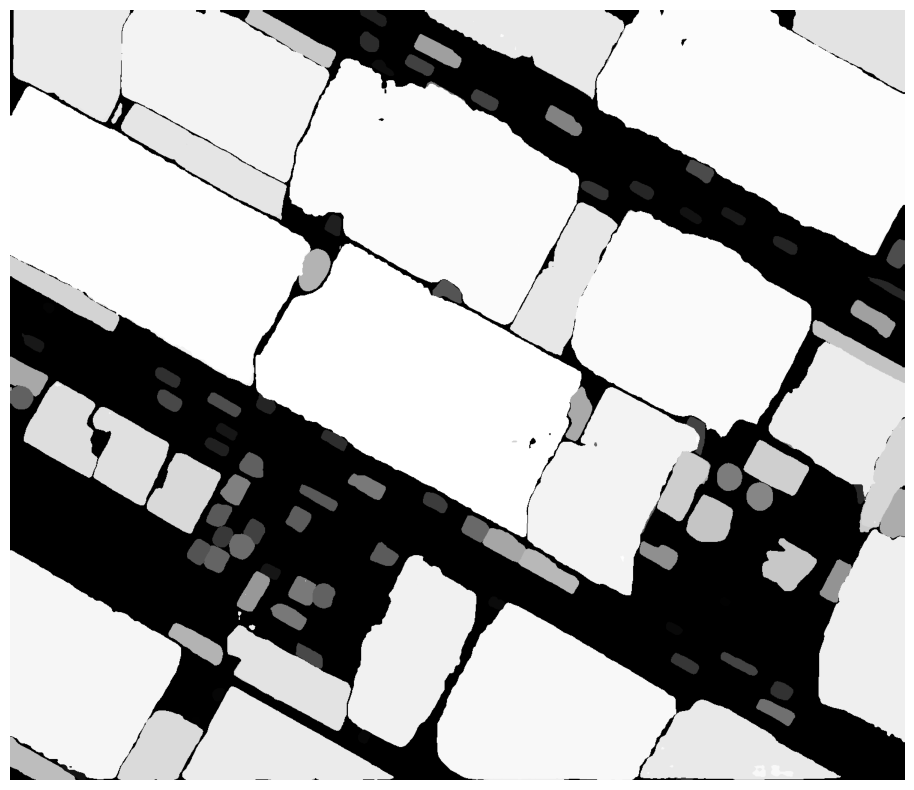

In [6]:
sam.show_masks(cmap="binary_r")

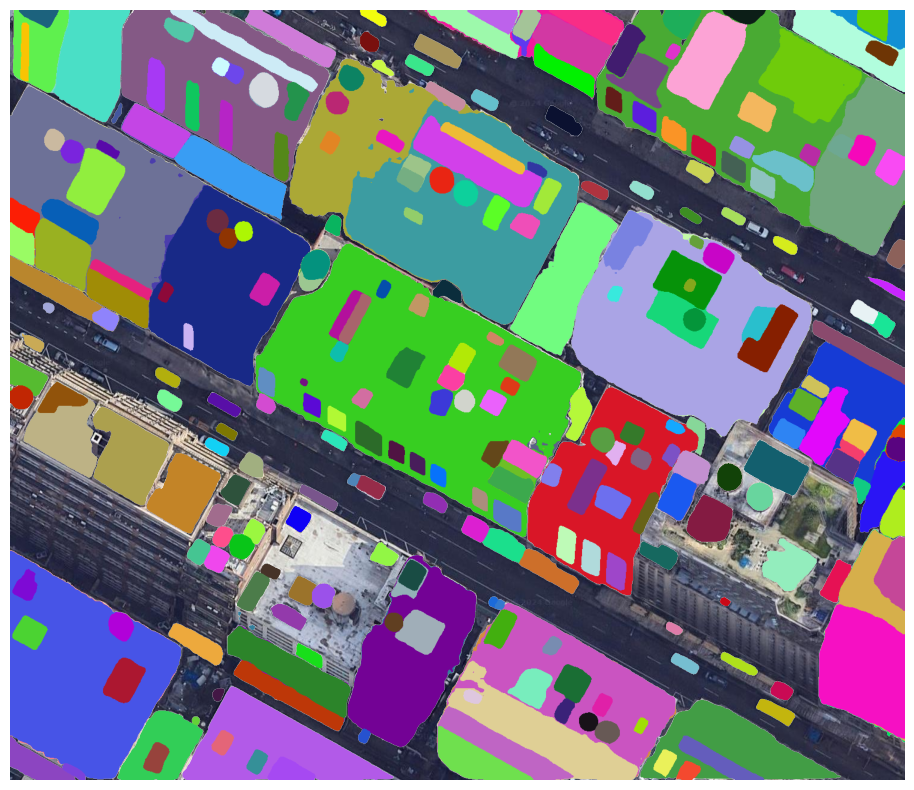

In [7]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")

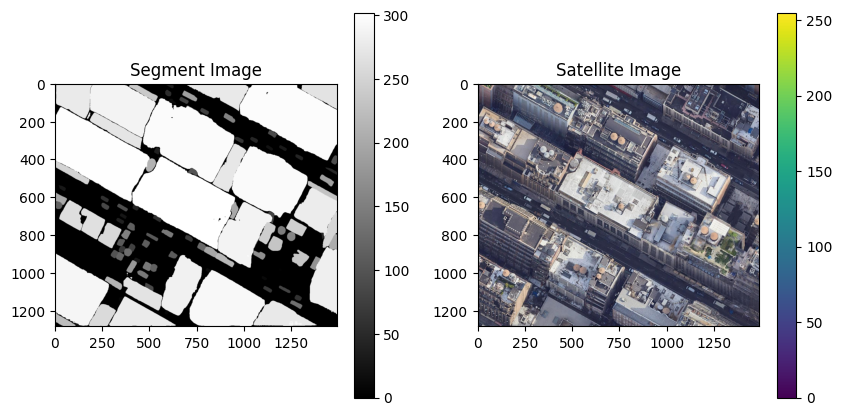

In [8]:
# Define the paths to the GeoTIFF images
segment_tif_path = 'segment.tif'
satellite_tif_path = 'satellite.tif'

# Open the segment GeoTIFF image
segment_ds = gdal.Open(segment_tif_path)
segment_img = segment_ds.ReadAsArray()

# Open the satellite GeoTIFF image
satellite_ds = gdal.Open(satellite_tif_path)
satellite_img = satellite_ds.ReadAsArray()

# Plot the segment image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segment_img, cmap='gray')
plt.title('Segment Image')
plt.colorbar()

# Plot the satellite image
plt.subplot(1, 2, 2)
plt.imshow(satellite_img.transpose(1, 2, 0))
plt.title('Satellite Image')
plt.colorbar()

plt.show()


M2. Load sidewalk Training data and visualize it

In [ ]:
# import os
# path = '/content/drive/MyDrive/Colab Notebooks/sidewalks'
# os.chdir(path) # set current working directory

In [18]:
from datasets import load_dataset

# Load the dataset
# dataset = load_dataset("back2classroom/sidewalks", streaming=True)
# train_data = dataset['train']
# val_data = dataset['val']
dataset = load_dataset("back2classroom/sidewalks_chunk4", split='train', streaming=True)


In [19]:
# study first iteration of data

first_record = next(iter(dataset))
print(first_record)

# Access specific features of the first record
filename = first_record['filename']
tif_data = first_record['tif']
tfw_data = first_record['tfw']
label_tif_data = first_record['label_tif']
label_tfw_data = first_record['label_tfw']

# Print the specific features
print("Filename:", filename)
# Print other features as needed
print("Label_TIF:", label_tif_data)

{'filename': '737_1_1', 'tfw': b'1.0000000000\r\n0.0000000000\r\n0.0000000000\r\n1.0000000000\r\n0.0000000000\r\n0.0000000000\r\n', 'tif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x

In [14]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def is_entirely_same_color(image_stream):
    # Open the image from the stream
    image = Image.open(image_stream)

    # Convert the image to numpy array
    np_image = np.array(image)

    # Check if all pixel values are the same as the first pixel
    return np_image.max()==0

def plot_first_n_tiff_images(dataset_stream, n=5):
    fig, axes = plt.subplots(2, n, figsize=(20, 8))
    filtered_records = []

    for i, data in enumerate(dataset_stream):
        if i >= n:
            break

        # Load label image
        name = data['filename']
        label_image_stream = io.BytesIO(data['label_tif'])
        is_same_color = is_entirely_same_color(label_image_stream)

        # Reset the stream's position
        label_image_stream.seek(0)

        # Check if label image is not consistently the same color
        if is_same_color == False:
            # Display 'tif' image
            image_stream = io.BytesIO(data['tif'])
            image = Image.open(image_stream)
            axes[0, i].imshow(image)
            axes[0, i].set_title(f"Image {i+1}: {name}")
            axes[0, i].axis('off')

            # Display 'label_tif' image
            label_image_stream.seek(0)  # Reset the stream's position
            label_image = Image.open(label_image_stream)
            axes[1, i].imshow(label_image)
            axes[1, i].set_title(f"Label Image {i+1}")
            axes[1, i].axis('off')

            # Store the record for further analysis if needed
            #filtered_records.append(data)  # Append only when the condition is met

    plt.show()
    return


In [20]:
import io
from PIL import Image
import numpy as np

def filter_records(dataset, max_records=None):
    filtered_records = []
    records_processed = 0

    for data in dataset:
        label_image_stream = io.BytesIO(data['label_tif'])

        # Check if the label image is not entirely the same color
        if not is_entirely_same_color(label_image_stream):
            filtered_records.append(data)
            records_processed += 1

            # Check if max_records is reached
            if max_records is not None and records_processed >= max_records:
                break

    return filtered_records


filtered_dataset = filter_records(dataset, max_records=8000)
# Now 'filtered_dataset' contains only records with 'label_tif' images that are not entirely the same color


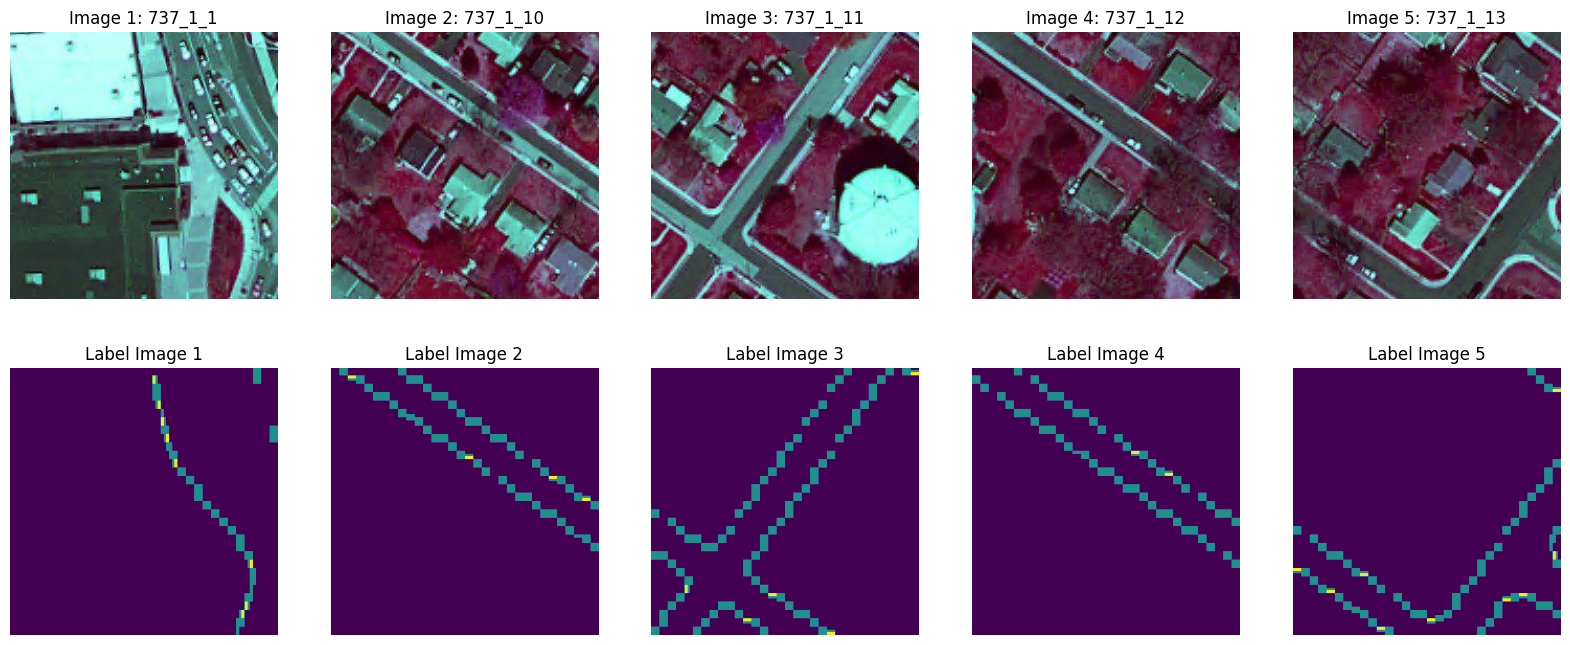

In [21]:
plot_first_n_tiff_images(filtered_dataset)

In [22]:
dataset_val = load_dataset("back2classroom/sidewalks", split='val', streaming=True)
print(next(iter(dataset_val)))


{'filename': '1016_10_1', 'tfw': b'1.0000000000\r\n0.0000000000\r\n0.0000000000\r\n1.0000000000\r\n0.0000000000\r\n2304.0000000000\r\n', 'tif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\

In [23]:
filtered_dataset_val = filter_records(dataset_val)

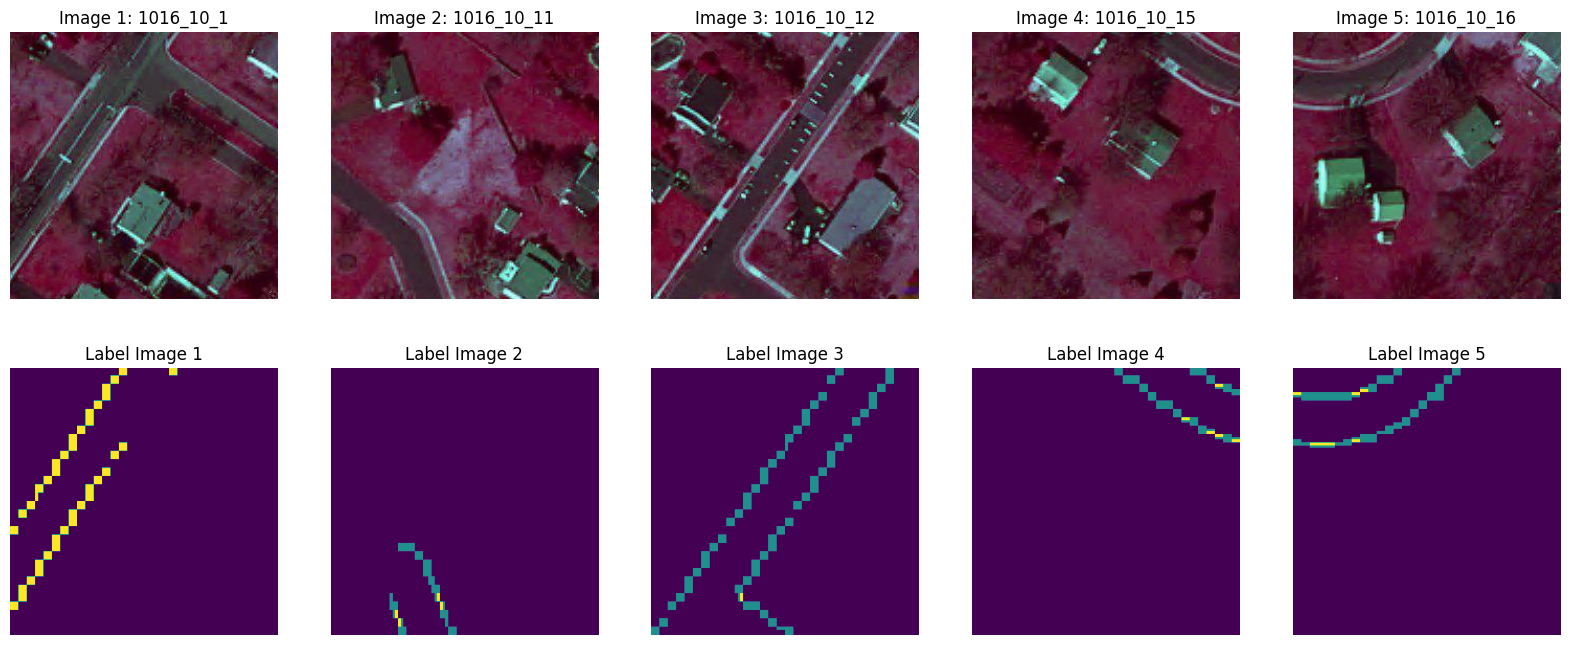

In [24]:
plot_first_n_tiff_images(filtered_dataset_val)

M3. Finetune the SAM model for the sidewalks dataset

In [25]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [26]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = Image.open(io.BytesIO(item["tif"]))
    ground_truth_mask = np.array(Image.open(io.BytesIO(item['label_tif'])))
    #print(ground_truth_mask)

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask
    inputs["image"] = np.array(image)

    return inputs

In [27]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [28]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=filtered_dataset, processor=processor)

In [29]:
val_dataset = SAMDataset(dataset=filtered_dataset_val, processor=processor)

In [30]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)


pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)
image (256, 256, 3)


In [31]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, drop_last=False)

In [32]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([4, 3, 1024, 1024])
original_sizes torch.Size([4, 2])
reshaped_input_sizes torch.Size([4, 2])
input_boxes torch.Size([4, 1, 4])
ground_truth_mask torch.Size([4, 256, 256])
image torch.Size([4, 256, 256, 3])


In [33]:
batch["ground_truth_mask"].shape

torch.Size([4, 256, 256])

In [34]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [35]:
from torch.optim import Adam, SGD
import monai
# Initialize the optimizer and the loss function
#optimizer = Adam(model.mask_decoder.parameters(), lr=1e-6, weight_decay=0)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceFocalLoss(sigmoid=True, squared_pred=True, reduction='mean')

In [ ]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 10

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

# Save the model's state dictionary to a file
torch.save(model.state_dict(), "/content/drive/MyDrive/Project/sidewalk_model_epoch10.pth")

100%|██████████| 2000/2000 [1:05:34<00:00,  1.97s/it]


EPOCH: 0
Mean loss: 0.5943823846876621


100%|██████████| 2000/2000 [1:02:59<00:00,  1.89s/it]


EPOCH: 1
Mean loss: 0.571394679069519


100%|██████████| 2000/2000 [1:03:03<00:00,  1.89s/it]


EPOCH: 2
Mean loss: 0.5632183329612017


100%|██████████| 2000/2000 [1:03:05<00:00,  1.89s/it]


EPOCH: 3
Mean loss: 0.5521107487976551


100%|██████████| 2000/2000 [1:03:01<00:00,  1.89s/it]


EPOCH: 4
Mean loss: 0.5432678217589855


100%|██████████| 2000/2000 [1:02:56<00:00,  1.89s/it]


EPOCH: 5
Mean loss: 0.531676196694374


100%|██████████| 2000/2000 [1:02:51<00:00,  1.89s/it]


EPOCH: 6
Mean loss: 0.5247077461928129


100%|██████████| 2000/2000 [1:02:51<00:00,  1.89s/it]


EPOCH: 7
Mean loss: 0.5205482829809189


100%|██████████| 2000/2000 [1:02:54<00:00,  1.89s/it]


EPOCH: 8
Mean loss: 0.5130287371873855


100%|██████████| 2000/2000 [1:03:01<00:00,  1.89s/it]


EPOCH: 9
Mean loss: 0.5135054708272219


In [ ]:
# Save the model's state dictionary to a file
torch.save(model.state_dict(), "/content/drive/MyDrive/Project/sidewalk_model_epoch10.pth")

**Inference**

In [36]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

In [37]:
# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
my_sw_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
my_sw_model.load_state_dict(torch.load("/content/drive/MyDrive/Project/sidewalk_model_epoch10.pth"))

<All keys matched successfully>

In [38]:
# set the device to cuda if available, otherwise use cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
my_sw_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

In [39]:
len(filtered_dataset)

8000

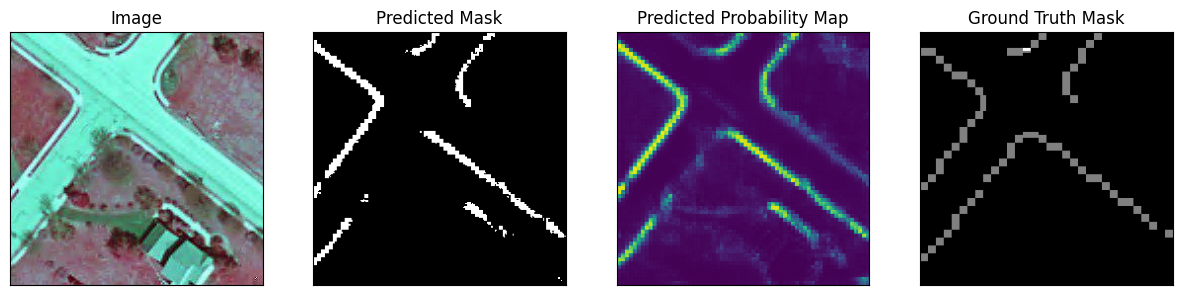

In [43]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, len(filtered_dataset)-1)

# load image
item = train_dataset[idx]
#print(item)
#image = Image.fromarray(np.uint8(array))
test_image = item["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = item["ground_truth_mask"]
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_sw_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_sw_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Predicted Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Predicted Probability Map")


# Plot the ground truth mask image on the most right
axes[3].imshow(np.array(ground_truth_mask), cmap='gray')  # Assuming the first image is grayscale
axes[3].set_title("Ground Truth Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

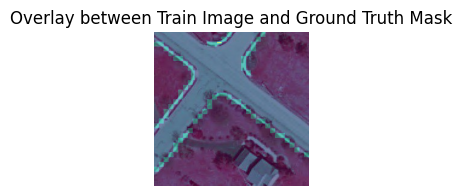

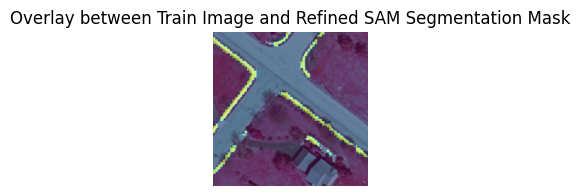

In [45]:
plt.figure(figsize=(5, 2))
# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(ground_truth_mask, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Train Image and Ground Truth Mask")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 2))
# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(medsam_seg, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Train Image and Refined SAM Segmentation Mask")
plt.axis('off')
plt.show()

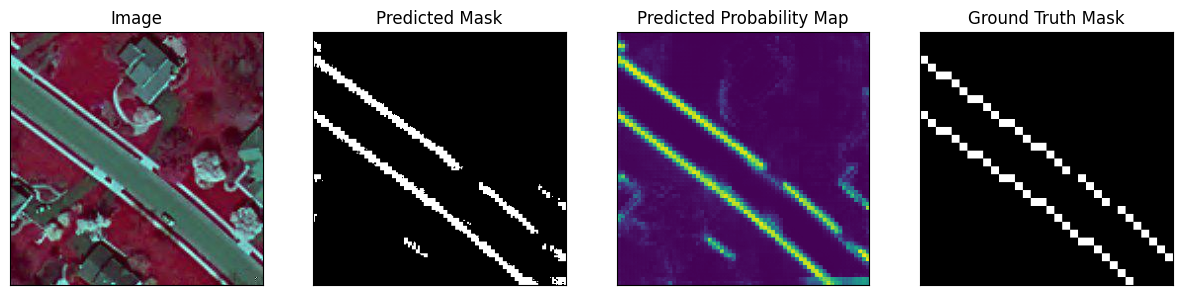

In [ ]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, len(filtered_dataset)-1)

# load image
#test_image = Image.open(io.BytesIO(item["tif"]))
#ground_truth_mask = np.array(Image.open(io.BytesIO(item['label_tif'])))
item = train_dataset[idx]
#print(item)
#image = Image.fromarray(np.uint8(array))
test_image = item["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = item["ground_truth_mask"]
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_sw_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_sw_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Predicted Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Predicted Probability Map")


# Plot the ground truth mask image on the most right
axes[3].imshow(np.array(ground_truth_mask), cmap='gray')  # Assuming the first image is grayscale
axes[3].set_title("Ground Truth Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()


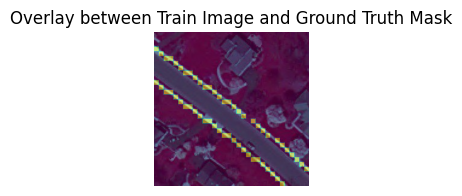

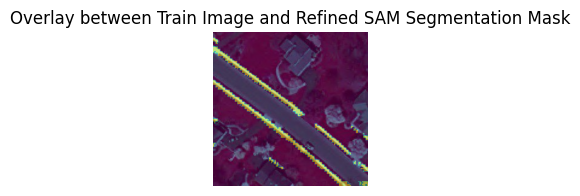

In [ ]:
plt.figure(figsize=(5, 2))
# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(ground_truth_mask, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Train Image and Ground Truth Mask")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 2))
# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(medsam_seg, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Train Image and Refined SAM Segmentation Mask")
plt.axis('off')
plt.show()

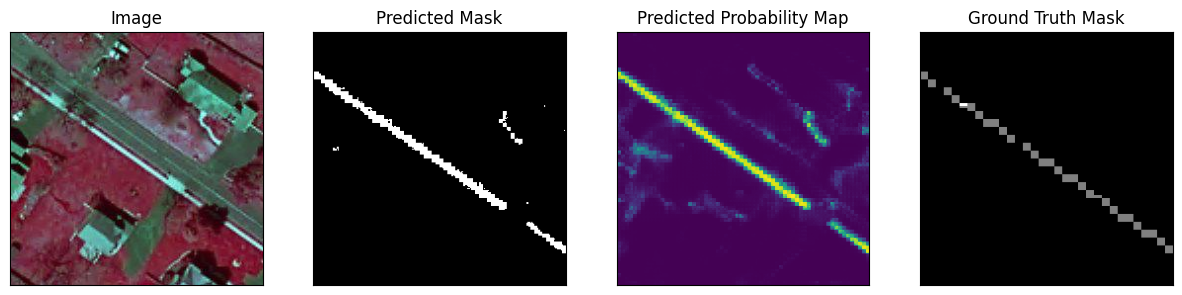

In [ ]:
idx = random.randint(0, len(filtered_dataset_val)-1)
# load image from val
item_val = val_dataset[idx]
#image = Image.fromarray(np.uint8(array))
test_image = item_val["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = item_val["ground_truth_mask"]
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_sw_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_sw_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Predicted Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Predicted Probability Map")


# Plot the ground truth mask image on the most right
axes[3].imshow(np.array(ground_truth_mask), cmap='gray')  # Assuming the first image is grayscale
axes[3].set_title("Ground Truth Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()


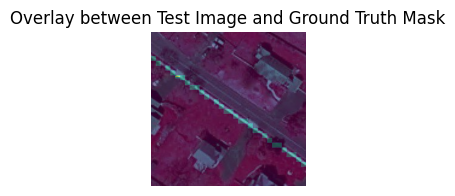

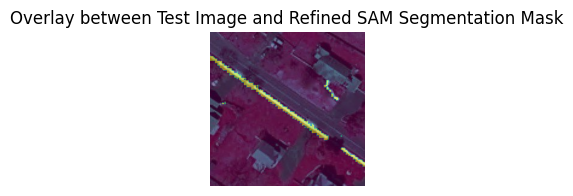

In [ ]:
plt.figure(figsize=(5, 2))

# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(ground_truth_mask, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Test Image and Ground Truth Mask")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 2))
# Plot the test_image
plt.imshow(np.array(test_image), cmap='gray')

# Plot the ground_truth_mask with transparency
plt.imshow(medsam_seg, alpha=0.5, cmap='viridis')

# Add title and display the plot
plt.title("Overlay between Test Image and Refined SAM Segmentation Mask")
plt.axis('off')
plt.show()